![self crossing solving](https://github.com/DamCB/tyssue/raw/master/doc/illus/self-crossing.svg)

In [106]:
from tyssue import Sheet, PlanarGeometry as geom
from tyssue.draw import sheet_view

import numpy as np
import matplotlib.pyplot as plt
from tyssue.core.objects import get_next_edges, get_prev_edges

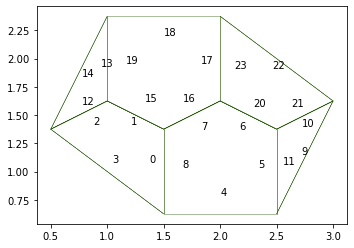

In [107]:

sheet = Sheet.planar_sheet_2d("55", 4, 4, 1, 1)
sheet.sanitize(trim_borders=True, order_edges=True)
geom.update_all(sheet)

fig, ax = sheet_view(sheet)
for e, data in sheet.edge_df.iterrows():
    ax.text(data[["sx", "tx", 'fx']].mean(),
            data[["sy", "ty", 'fy']].mean(), e)

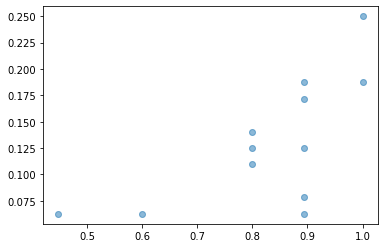

In [108]:
sheet.edge_df["prev"] = get_prev_edges(sheet)

def update_aperture(sheet):
    prev = sheet.edge_df["prev"]
    sheet.edge_df[["ux", "uy"]] = sheet.edge_df[["dx", "dy"]] / sheet.edge_df["length"].to_numpy()[:, None]
    sheet.edge_df['aperture'] = np.cross(
        sheet.edge_df.loc[prev, ["ux", "uy"]],
        sheet.edge_df[["ux", "uy"]]
    )

update_aperture(sheet)
fig, ax = plt.subplots()
ax.plot(sheet.edge_df['aperture'],
        sheet.edge_df['sub_area'], "o", alpha=0.3)

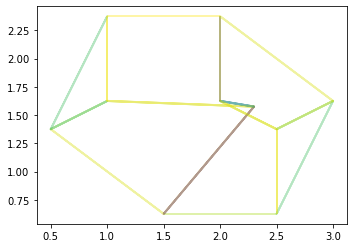

In [109]:
e = 7
s, t, f = sheet.edge_df.loc[e, ['srce', 'trgt', 'face']]

sheet.vert_df.loc[t, "x"] += 0.8
sheet.vert_df.loc[t, "y"] += 0.2

geom.update_all(sheet)
update_aperture(sheet)
fig, ax = sheet_view(
    sheet,
    edge={
        "color": sheet.edge_df["aperture"],
        "width": 2, 
        "alpha": 0.4,
    }
)


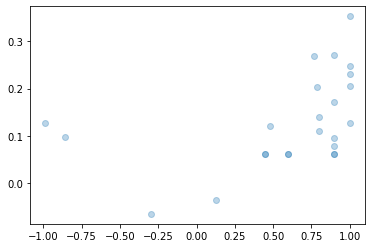

In [110]:
fig, ax = plt.subplots()
ax.plot(sheet.edge_df['aperture'],
        sheet.edge_df['sub_area'], "o", alpha=0.3)


In [114]:
sheet.edge_df[sheet.edge_df["aperture"] < 0]


,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,is_valid,rx,ry,phi,sub_area,prev,aperture
edge,,,,,,,,,,,,,,,,,,,,,,
7,5,-0.130,0.304138,1,4,0.3,-0.05,2.0,1.625,2.3,1.575,2.16,1.165,0.986394,-0.164399,True,-0.16,0.46,1.570796,-0.0650,6,-0.294086
8,9,0.195,1.241974,1,5,-0.8,-0.95,2.3,1.575,1.5,0.625,2.16,1.165,-0.644136,-0.764911,True,0.14,0.41,2.677945,0.0975,7,-0.860399
17,0,0.255,0.750000,4,4,0.0,0.75,2.0,1.625,2.0,2.375,1.66,1.915,0.000000,1.000000,True,0.34,-0.29,-0.463648,0.1275,16,-0.986394


More generic:

https://doc.cgal.org/latest/Surface_sweep_2/index.html
![CGAl self crossing](https://doc.cgal.org/latest/Surface_sweep_2/sl_simple.png)